In [1]:
import argparse, os, time
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import seaborn as sns
from collections import defaultdict
from tqdm import tqdm
import pickle
from ethnicseer import EthnicClassifier

In [2]:
indivs20 = "./data/CampaignFin20/indivs20.txt"
indivs22 = "./data/CampaignFin22/indivs22.txt"
donors20withpred80 = "./data/donors20_with_pred80.csv"
donors20withlastname = "./data/donors20_with_pred_lastname.csv"

In [3]:
donors20 = pd.read_csv(donors20withlastname)
donors20["ethnic"] = donors20.apply(lambda x: x["ethnic"] if x["contrib_id"].strip() != "" else "not", axis=1)
donors20.head(10)

,contrib_id,name,name_new,lastname,total_donated,donation_count,avg_donation,ethnic
0,,"FOR AMERICA, AMY",amy for america,for america,1.255595e+09,27780,4.519781e+04,not
1,U00000037041,"BLOOMBERG, MICHAEL",michael bloomberg,bloomberg,1.127713e+09,960,1.174701e+06,not
2,U00000036521,"STEYER, THOMAS F",thomas f steyer,steyer,3.790613e+08,779,4.865999e+05,not
3,U00000046841,"MELLON, TIMOTHY",timothy mellon,mellon,4.513356e+07,23,1.962328e+06,not
4,U0000000310A,"ADELSON, MIRIAM O DR",miriam o dr adelson,adelson,4.497155e+07,134,3.356086e+05,not
5,U00000003101,"ADELSON, SHELDON G MR",sheldon g mr adelson,adelson,4.481995e+07,129,3.474415e+05,not
6,U00000036901,"UIHLEIN, RICHARD E",richard e uihlein,uihlein,3.530238e+07,342,1.032233e+05,not
7,U00000036551,"GRIFFIN, KENNETH",kenneth griffin,griffin,3.363993e+07,197,1.707611e+05,not
8,U00000003611,"SCHWARZMAN, STEPHEN A",stephen a schwarzman,schwarzman,3.340650e+07,242,1.380434e+05,not
9,U00000046781,"JURVETSON, KARLA",karla jurvetson,jurvetson,3.249351e+07,973,3.339518e+04,not


In [10]:
donors20.sort_values(by="total_donated", ascending=False).head(10)

,contrib_id,name,name_new,lastname,total_donated,donation_count,avg_donation,ethnic
0,,"FOR AMERICA, AMY",amy for america,for america,1.255595e+09,27780,4.519781e+04,not
1,U00000037041,"BLOOMBERG, MICHAEL",michael bloomberg,bloomberg,1.127713e+09,960,1.174701e+06,not
2,U00000036521,"STEYER, THOMAS F",thomas f steyer,steyer,3.790613e+08,779,4.865999e+05,not
3,U00000046841,"MELLON, TIMOTHY",timothy mellon,mellon,4.513356e+07,23,1.962328e+06,not
4,U0000000310A,"ADELSON, MIRIAM O DR",miriam o dr adelson,adelson,4.497155e+07,134,3.356086e+05,not
5,U00000003101,"ADELSON, SHELDON G MR",sheldon g mr adelson,adelson,4.481995e+07,129,3.474415e+05,not
6,U00000036901,"UIHLEIN, RICHARD E",richard e uihlein,uihlein,3.530238e+07,342,1.032233e+05,not
7,U00000036551,"GRIFFIN, KENNETH",kenneth griffin,griffin,3.363993e+07,197,1.707611e+05,not
8,U00000003611,"SCHWARZMAN, STEPHEN A",stephen a schwarzman,schwarzman,3.340650e+07,242,1.380434e+05,not
9,U00000046781,"JURVETSON, KARLA",karla jurvetson,jurvetson,3.249351e+07,973,3.339518e+04,not


In [11]:
donors20[donors20["ethnic"] == "ind"].sort_values(by="total_donated", ascending=False).head(10)

,contrib_id,name,name_new,lastname,total_donated,donation_count,avg_donation,ethnic
74,U00000040581,"ANWAR, SYED J",syed j anwar,anwar,3840124.0,201,19105.094527,ind
87,U00000047321,"KIANI, JOE",joe kiani,kiani,3310500.0,135,24522.222222,ind
127,U00000045761,"ANSARY, HUSHANG",hushang ansary,ansary,2622718.0,190,13803.778947,ind
145,U00000033011,"KHOSLA, VINOD",vinod khosla,khosla,2410795.0,56,43049.910714,ind
213,U00000045811,"MANOCHERIAN, JED",jed manocherian,manocherian,1797562.0,276,6512.905797,ind
237,U00000045762,"ANSARY, SHAHLA",shahla ansary,ansary,1683591.0,88,19131.715909,ind
257,m0001327150,"GANDHI, SAMEER",sameer gandhi,gandhi,1626699.0,111,14654.945946,ind
327,i30032161751,"CHANDI, NACHHATTAR",nachhattar chandi,chandi,1311745.0,104,12612.932692,ind
337,h10013502001,"REDDY, PREM",prem reddy,reddy,1297700.0,59,21994.915254,ind
339,c01704896561,"QAZI, MOHAMMAD MR",mohammad mr qazi,qazi,1294500.0,91,14225.274725,ind


In [13]:
print(len(donors20[donors20["ethnic"] == "ind"].sort_values(by="total_donated", ascending=False)))

24271


In [ ]:
print(donors20["total_donated"].sum())
print(donors20[donors20["ethnic"] == "ind"]["total_donated"].sum())
print((donors20[donors20["ethnic"] == "ind"]["total_donated"].sum()/donors20["total_donated"].sum())*100, "% of donated amount is from diaspora")

11538205144.0
110889636.0
0.9610648676814685 %


In [17]:
print(len(donors20))
print(len(donors20[donors20["ethnic"] == "ind"]))
print((len(donors20[donors20["ethnic"] == "ind"])/len(donors20))*100, "% of donors are from diaspora")

3847755
24271
0.6307834048685532 % of donors are from diaspora


In [18]:
print(donors20["donation_count"].median())
print(donors20[donors20["ethnic"] == "ind"]["donation_count"].median())

3.0
2.0


In [19]:
print(donors20["total_donated"].median())
print(donors20[donors20["ethnic"] == "ind"]["total_donated"].median())

317.0
500.0


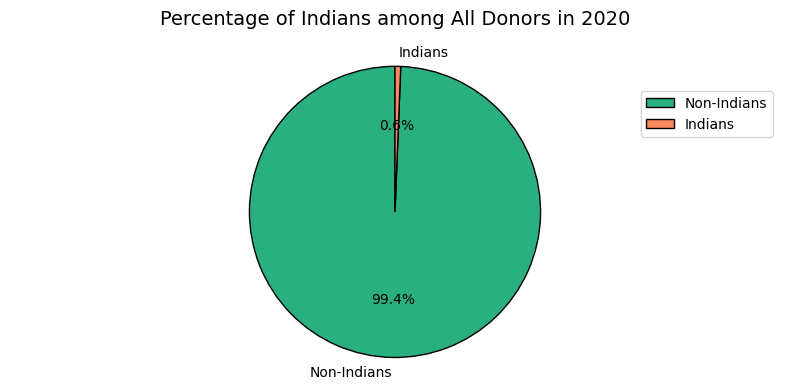

In [20]:
indian_counts = donors20['ethnic'].value_counts()

plt.figure(figsize=(8, 4))
plt.pie(indian_counts, 
        labels=['Non-Indians', 'Indians'], 
        colors=['#2ab07f', '#fb8761'], 
        autopct='%1.1f%%', 
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
        textprops={'fontsize': 10})

plt.title('Percentage of Indians among All Donors in 2020', pad=20, fontsize=14)
plt.axis('equal')
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
plt.tight_layout()
plt.show()

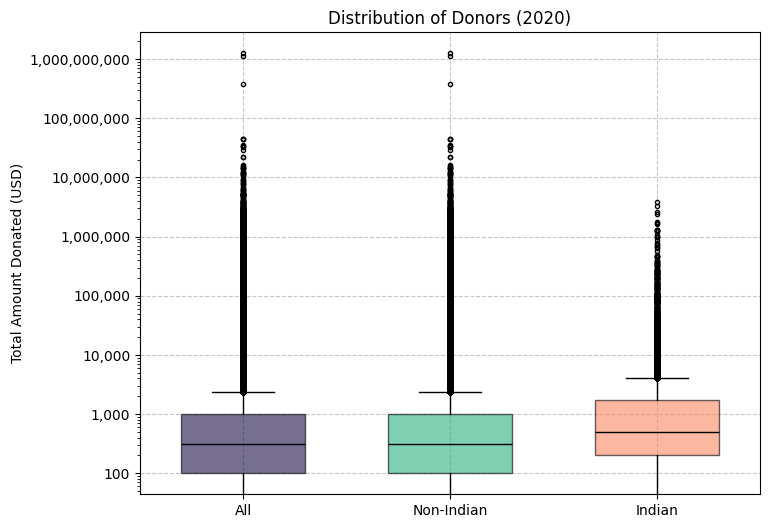

In [22]:
amounts_all = donors20['total_donated']
amounts_non_indian = donors20[donors20['ethnic'] == "not"]['total_donated']
amounts_indian = donors20[donors20['ethnic'] == "ind"]['total_donated']

plt.figure(figsize=(8, 6))
plot = plt.boxplot([amounts_all, amounts_non_indian, amounts_indian], 
                   tick_labels=["All", "Non-Indian", "Indian"], 
                   patch_artist=True, 
                   widths=0.6, 
                   medianprops={"color": "black", "linewidth": 1}, 
                   flierprops={"marker": "o", "markersize": 3})

colors = ["#1b1044", "#2ab07f", "#fb8761"]
for patch, color in zip(plot["boxes"], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

plt.title("Distribution of Donors (2020)")
plt.ylabel("Total Amount Donated (USD)")
plt.yscale("log")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

C:\Users\karnav\AppData\Local\Temp\ipykernel_1604\424151394.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=donors20[
C:\Users\karnav\AppData\Local\Temp\ipykernel_1604\424151394.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=donors20[


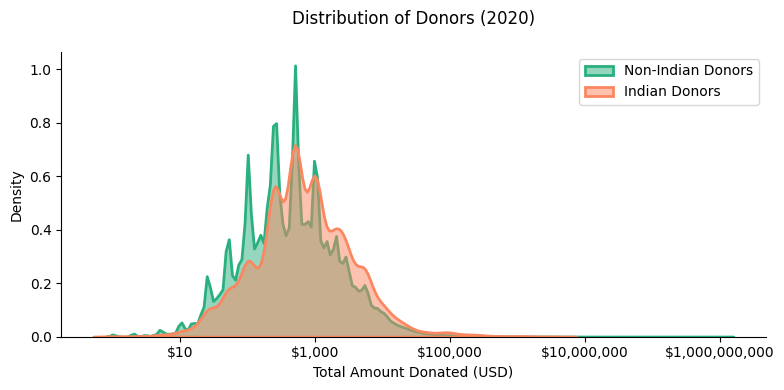

In [37]:
plt.figure(figsize=(8, 4))

sns.kdeplot(data=donors20[
    (donors20['total_donated'].notna()) & 
    (donors20['total_donated'] > 0)
][donors20['ethnic'] == "not"]['total_donated'],
            label='Non-Indian Donors',
            color='#2ab07f',
            fill=True,
            alpha=0.5,
            linewidth=2,
            log_scale=True)
sns.kdeplot(data=donors20[
    (donors20['total_donated'].notna()) & 
    (donors20['total_donated'] > 0)
][donors20['ethnic'] == "ind"]['total_donated'],
            label='Indian Donors',
            color='#fb8761',
            fill=True,
            alpha=0.5,
            linewidth=2,
            log_scale=True)

plt.title("Distribution of Donors (2020)", pad=20)
plt.xlabel("Total Amount Donated (USD)")
plt.ylabel("Density")
plt.xscale('log')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()